In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import rotate
import cv2
from PIL import Image

Phase retrieval-Extended Paganin

In [2]:
#nameP="AngiografiaR"
#nameI="In-line"
#nameV="Test"
#nameF="NoFilter"
#nameD="Dist3"
#nameTP="PMMA"
#namePP="E15"
nameP="AngiografiaR"
nameI="In-line"
nameV="30kVp"
nameF="NoFilter"
nameD="Dist3"
nameTP="Yodo"
namePP="Diam7"
name=nameP+"/"+nameI+"/"+nameV+"/"+nameF+"/"+nameD+"/"+nameTP+"/"+namePP+"/RAWSM.txt"
a=5.5*(10**(-5))
Npixeles=256
E=15*(10**(3))
E_J=E*1.6*(10**(-19))
h=6.63*10**(-34)
c=3*(10**(8))
k=(2*np.pi*E_J)/(h*c)
z=1.2
zs=0.6
M=(z+zs)/zs
#M=1
u=1
delta_m1=1.19E-06 #PMMA
beta_m1=8.56E-10
#delta_muestra=1.20E-09 #Air
#beta_muestra=1.37E-12
delta_muestra=8.36E-07 #Iodine
beta_muestra=2.79E-09
#delta_muestra=1.08E-06 #Blood
#beta_muestra=1.21E-09
#delta_m1=1.06E-06 #Aorta
#beta_m1=1.19E-09
#delta_muestra=2.95E-06 #HA
#beta_muestra=3.06E-08
delta_rel=(delta_muestra-delta_m1) 
beta_rel=(beta_muestra-beta_m1)
s=0.4
#s=0
N=0
NN=255
MMM=7
MMMM=250
Y1=0
Y2=255
Y3=0
Y4=255
x=np.arange(0,Npixeles,25)
xx=np.arange(0,Npixeles,1)
x_mm = np.multiply(xx,np.round((a*(10**(3)))/M,3))
x_J = np.multiply(x,np.round((a*(10**(3)))/M,2))
labels=x_J.tolist()

In [3]:
def Esp(name, a, delta, beta, E, z, M, k, ss):
    frr = np.fft.fftshift(np.fft.fft2(name))  
    Npixeles = len(name)
    u=np.fft.fftshift(np.fft.fftfreq(Npixeles, a))
    v=np.fft.fftshift(np.fft.fftfreq(Npixeles, a))
    uu, vv = np.meshgrid(u, v)
    freq_matrix = (4*(np.pi**2))*(uu**2 + vv**2)
    freq_matrixx=-(2/(a**2))*(np.cos(2*np.pi*a*uu)+np.cos(2*np.pi*a*vv)-2)
    W=(delta*z)/(2*beta*k*M) 
    AA=np.ones((Npixeles,Npixeles)) 
    Q=AA+W*freq_matrixx
    QQ=(Q)/(Q**2+ss)
    A=QQ*frr
    img_back = np.fft.ifft2(np.fft.ifftshift(A)).real 
    A1=np.log(img_back)
    return A1

In [4]:
def func1(x,r,PosX):
    k=np.sqrt(r**2 - ((PosX-x))**2)
    return k

In [5]:
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

In [6]:
RAWS= np.rot90(np.genfromtxt(name),u) #Se llama la imagen simulada.
#RAWSN= np.genfromtxt(name)+0.01
RAWSN=RAWS/(np.mean(np.concatenate((RAWS[N:NN,0:MMM],RAWS[N:NN,MMMM:256]),1)))

In [7]:
PIRAWSN=PI(RAWSN,Y3,Y4,0,Npixeles)

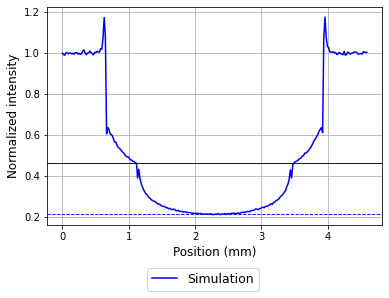

In [8]:
#XX1=0.64 #Diam1 Air
#XX2=0.55
#XX1=0.635 #Diam2 Air
#XX2=0.53
#XX1=0.634 #Diam3 Air
#XX2=0.51
#XX1=0.637 #Diam4 Air
#XX2=0.5
#XX1=0.635 #Diam5 Air
#XX2=0.47
#XX1=0.633 #Diam6 Air
#XX2=0.44
#XX1=0.753 #Diam7 Air
#XX2=0.5
#XX1=0.399 #Diam1 Iodine
#XX2=0.55
#XX1=0.357 #Diam2 Iodine
#XX2=0.535
#XX1=0.315 #Diam3 Iodine
#XX2=0.51
#XX1=0.28 #Diam4 Iodine
#XX2=0.495
#XX1=0.25 #Diam5 Iodine
#XX2=0.47
#XX1=0.19 #Diam6 Iodine
#XX2=0.445
XX1=0.213 #Diam7 Iodine
XX2=0.465
#XX1=0.49 #Diam1 Blood
#XX2=0.55
#XX1=0.463 #Diam2 Blood
#XX2=0.535
#XX1=0.431 #Diam3 Blood
#XX2=0.519
#XX1=0.398 #Diam4 Blood
#XX2=0.5
#XX1=0.365 #Diam5 Blood
#XX2=0.475
#XX1=0.306 #Diam6 Blood
#XX2=0.44
#XX1=0.337 #Diam7 Blood
#XX2=0.465
fig,ax=plt.subplots()
plt.plot(x_mm,PIRAWSN,label="Simulation", color="blue")
plt.axhline(y=XX1, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
plt.axhline(y=XX2, xmin=0, xmax=255,linestyle="-", color="black",linewidth=0.9)
plt.ylabel("Normalized intensity",fontsize=12)
plt.xlabel("Position (mm)",fontsize=12)
plt.grid()
#plt.ylim(0.2,0.5)
plt.legend(bbox_to_anchor=(0.65, -0.17),mode = "Expand", ncol=3,fontsize=12.5)

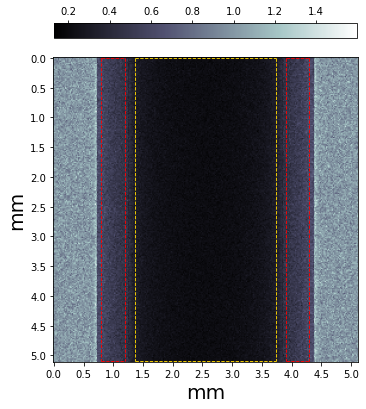

In [9]:
#S1=25
#S6=232
#X1=84 #Diameter 1
#X2=105
#X3=113
#X4=143
#X5=151
#X6=171
#X1=78 #Diameter 2
#X2=99
#X3=107
#X4=149
#X5=157
#X6=177
#X1=71 #Diameter 3
#X2=91
#X3=99
#X4=157
#X5=165
#X6=185
#X1=62 #Diameter 4
#X2=82
#X3=90
#X4=165
#X5=173
#X6=193
#X1=52 #Diameter 5
#X2=73
#X3=81
#X4=175
#X5=183
#X6=203
#X1=26 #Diameter 6
#X2=47
#X3=55
#X4=201
#X5=209
#X6=229
X1=40 #Diameter 7
X2=60
X3=68
X4=187
X5=195
X6=215
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(RAWSN, cmap="bone")
#ax.vlines(x=S1, ymin=Y3, ymax=Y4,linestyle="--", color="red",linewidth=0.9)
#ax.vlines(x=S6, ymin=Y3, ymax=Y4,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=X1, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=X2, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.hlines(y=Y1, xmin=X1, xmax=X2,linestyle="--", color="red",linewidth=0.9)
ax.hlines(y=Y2, xmin=X1, xmax=X2,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=X3, ymin=Y3, ymax=Y4,linestyle="--", color="gold",linewidth=0.9)
ax.vlines(x=X4, ymin=Y3, ymax=Y4,linestyle="--", color="gold",linewidth=0.9)
ax.hlines(y=Y3, xmin=X3, xmax=X4,linestyle="--", color="gold",linewidth=0.9)
ax.hlines(y=Y4, xmin=X3, xmax=X4,linestyle="--", color="gold",linewidth=0.9)
ax.vlines(x=X5, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=X6, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.hlines(y=Y1, xmin=X5, xmax=X6,linestyle="--", color="red",linewidth=0.9)
ax.hlines(y=Y2, xmin=X5, xmax=X6,linestyle="--", color="red",linewidth=0.9)
plt.ylabel("mm",fontsize=20)
plt.xlabel("mm",fontsize=20)
plt.xticks(x,labels)
plt.yticks(x,labels)
fig.colorbar(u,ax=ax,location='top', anchor=(0.5, 0), shrink=0.775)

In [10]:
#zz=0
#zzz=0
#TestEsC=np.concatenate((zz+np.zeros(S1-zzz),func1(xx[S1-zzz:S6+zzz],(S6-S1+2*(zzz))/2,(S6+S1)/2),zz+np.zeros(Npixeles-(S6+zzz))))*10**(-4)

In [11]:
M_RAWSS=Esp((M**2)*RAWSN, a, delta_rel, beta_rel, E, z, M, k, s)
M_RAWS=M_RAWSS-np.mean(np.concatenate((M_RAWSS[N:NN,0:MMM],M_RAWSS[N:NN,MMMM:256]),1))

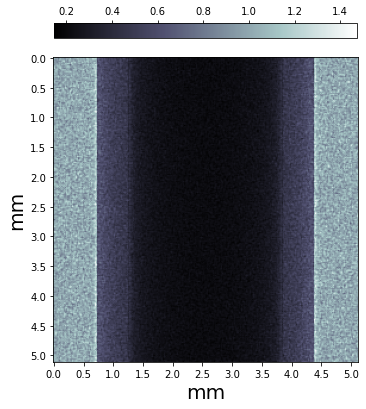

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(np.exp(M_RAWS[:,:]), cmap="bone")
plt.ylabel("mm",fontsize=20)
plt.xlabel("mm",fontsize=20)
plt.xticks(x,labels)
plt.yticks(x,labels)
fig.colorbar(u,ax=ax,location='top', anchor=(0.5, 0), shrink=0.775)

In [13]:
#fig,ax=plt.subplots()
#plt.plot(x_mm, TestEsC, '-', label="Total Thickness", color="blue")
##plt.title("Projected Thickness (External material) profiles of "+ Name+ " \n"+name,fontsize=15)
#plt.ylabel("Projected Thickness (m)",fontsize=14)
#plt.xlabel("Position (mm)",fontsize=12)
#plt.grid()
#plt.legend(loc=0, fontsize=10.5)

In [14]:
PIMRAWS=PI(np.exp(M_RAWS[:,:]),Y3,Y4,0,Npixeles)

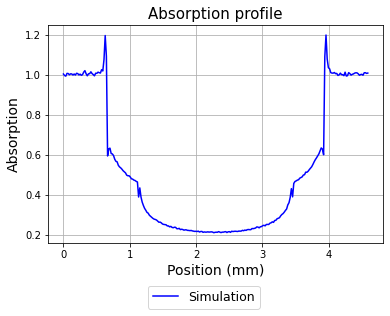

In [15]:
fig,ax=plt.subplots()
plt.plot(x_mm,PIMRAWS,label="Simulation", color="blue")
plt.title("Absorption profile",fontsize=15)
plt.ylabel("Absorption",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.legend(bbox_to_anchor=(0.65, -0.17),mode = "Expand", ncol=3,fontsize=12.5)

In [16]:
#PhasePS=-k*delta_c*TestEsC+(delta_rel/(2*beta_rel))*M_RAWS
#PhasePS=(delta_rel/(2*beta_rel))*M_RAWS
PhasePSS=-(delta_rel/(2*beta_rel))*M_RAWSS
PhasePS=PhasePSS/(np.mean(np.concatenate((PhasePSS[Y3:Y4,0:MMM],PhasePSS[Y3:Y4,MMMM:256]),1)))

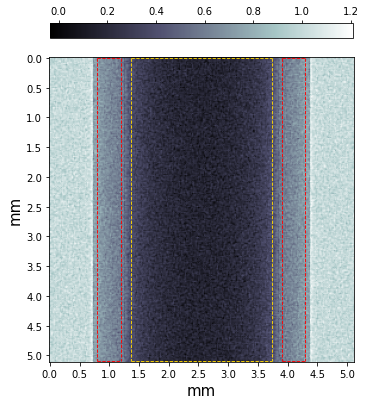

In [17]:
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(PhasePS, cmap="bone")
ax.vlines(x=X1, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=X2, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.hlines(y=Y1, xmin=X1, xmax=X2,linestyle="--", color="red",linewidth=0.9)
ax.hlines(y=Y2, xmin=X1, xmax=X2,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=X3, ymin=Y3, ymax=Y4,linestyle="--", color="gold",linewidth=0.9)
ax.vlines(x=X4, ymin=Y3, ymax=Y4,linestyle="--", color="gold",linewidth=0.9)
ax.hlines(y=Y3, xmin=X3, xmax=X4,linestyle="--", color="gold",linewidth=0.9)
ax.hlines(y=Y4, xmin=X3, xmax=X4,linestyle="--", color="gold",linewidth=0.9)
ax.vlines(x=X5, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=X6, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.hlines(y=Y1, xmin=X5, xmax=X6,linestyle="--", color="red",linewidth=0.9)
ax.hlines(y=Y2, xmin=X5, xmax=X6,linestyle="--", color="red",linewidth=0.9)
plt.ylabel("mm",fontsize=15)
plt.xlabel("mm",fontsize=15)
plt.xticks(x,labels)
plt.yticks(x,labels)
fig.colorbar(u,ax=ax,location='top', anchor=(0.5, 0), shrink=0.775)

In [18]:
PIPS=PI(PhasePS,Y3,Y4,0,Npixeles)

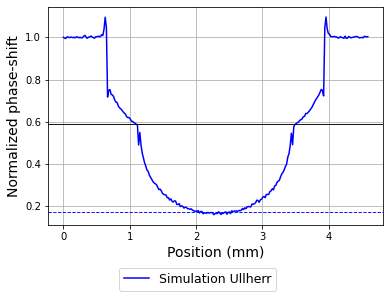

In [19]:
#YX1=0.795 #Diam1 Air
#YX2=0.7
#YX1=0.794 #Diam2 Air
#YX2=0.685
#YX1=0.794 #Diam3 Air
#YX2=0.638
#YX1=0.795 #Diam4 Air
#YX2=0.628
#YX1=0.79 #Diam5 Air
#YX2=0.591
#YX1=0.795 #Diam6 Air
#YX2=0.559
#YX1=0.797 #Diam7 Air
#YX2=0.61
#YX1=0.505 #Diam1 Iodine
#YX2=0.681
#YX1=0.442 #Diam2 Iodine
#YX2=0.661
#YX1=0.375 #Diam3 Iodine
#YX2=0.638
#YX1=0.315 #Diam4 Iodine
#YX2=0.626
#YX1=0.25 #Diam5 Iodine
#YX2=0.597
#YX1=0.101 #Diam6 Iodine
#YX2=0.561
YX1=0.173 #Diam7 Iodine
YX2=0.591
#YX1=0.617 #Diam1 Blood
#YX2=0.68
#YX1=0.588 #Diam2 Blood
#YX2=0.671
#YX1=0.547 #Diam3 Blood
#YX2=0.645
#YX1=0.502 #Diam4 Blood
#YX2=0.628
#YX1=0.455 #Diam5 Blood
#YX2=0.598
#YX1=0.36 #Diam6 Blood
#YX2=0.559
#YX1=0.41 #Diam7 Blood
#YX2=0.595
fig,ax=plt.subplots()
plt.plot(x_mm,PIPS,label="Simulation Ullherr", color="blue")
plt.axhline(y=YX1, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
plt.axhline(y=YX2, xmin=0, xmax=255,linestyle="-", color="black",linewidth=0.9)
plt.ylabel("Normalized phase-shift",fontsize=14)
#plt.ylabel("Phase-shift",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
#plt.ylim(0.1,0.7)
plt.grid()
plt.legend(bbox_to_anchor=(0.7, -0.17),mode = "Expand", ncol=3,fontsize=12.5)

In [20]:
SmeanB=np.mean(np.concatenate((RAWSN[Y1:Y2,X1:X2],RAWSN[Y1:Y2,X5:X6]),1))
SmeanS=np.mean(RAWSN[Y3:Y4,X3:X4])
SdestB=np.std(np.concatenate((RAWSN[Y1:Y2,X1:X2],RAWSN[Y1:Y2,X5:X6]),1))
SdestS=np.std(RAWSN[Y3:Y4,X3:X4])
SCNR1=(np.abs(SmeanB-SmeanS))/np.sqrt(SdestB**2+SdestS**2)
SCNR2=(np.abs(SmeanB-SmeanS))/SdestB
print("Simulation RAW image/The meanB is",np.round(SmeanB,3))
print("Simulation RAW image/The meanS is",np.round(SmeanS,3))
print("Simulation RAW image/The desB is",np.round(SdestB,3))
print("Simulation RAW image/The desS is",np.round(SdestS,3))
#print("Simulation RAW image/The CNR1 is", np.round(SCNR1,3))
print("Simulation RAW image/The CNR2 is", np.round(SCNR2,3))

Simulation RAW image/The meanB is 0.526
Simulation RAW image/The meanS is 0.24
Simulation RAW image/The desB is 0.067
Simulation RAW image/The desS is 0.039
Simulation RAW image/The CNR2 is 4.292


In [21]:
SmeanBP=np.mean(np.concatenate((PhasePS[Y1:Y2,X1:X2],PhasePS[Y1:Y2,X5:X6]),1))
SmeanSP=np.mean(PhasePS[Y3:Y4,X3:X4])
SdestBP=np.std(np.concatenate((PhasePS[Y1:Y2,X1:X2],PhasePS[Y1:Y2,X5:X6]),1))
SdestSP=np.std(PhasePS[Y3:Y4,X3:X4])
SCNRP1=(np.abs(SmeanBP-SmeanSP))/np.sqrt(SdestBP**2+SdestSP**2)
SCNRP2=(np.abs(SmeanBP-SmeanSP))/SdestBP
print("Simulation phase image/The meanB is",np.round(SmeanBP,3))
print("Simulation phase image/The meanS is",np.round(SmeanSP,3))
print("Simulation phase image/The desB is",np.round(SdestBP,3))
print("Simulation phase image/The desS is",np.round(SdestSP,3))
#print("Simulation phase image/The CNR1 is", np.round(SCNRP1,3))
print("Simulation phase image/The CNR2 is", np.round(SCNRP2,3))

Simulation phase image/The meanB is 0.653
Simulation phase image/The meanS is 0.227
Simulation phase image/The desB is 0.063
Simulation phase image/The desS is 0.08
Simulation phase image/The CNR2 is 6.776
